In [1]:
%load_ext autoreload
%autoreload 2


import os, sys
sys.path.append('dynamic-coattention-network-plus')
sys.path.append('dynamic-coattention-network-plus/question_answering')
import tensorflow as tf 
from duplicate_questions.models.siamese_bilstm.siamese_bilstm import SiameseBiLSTM
from utils import get_data_paths
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from question_answering.dataset import SquadDataset
from main import to_siamese, ImportModel
import json

/Users/Arnav/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensorflow Version ---------->  1.4.0


In [2]:
data_dir = 'dynamic-coattention-network-plus/data/squad'
embed_path = "dynamic-coattention-network-plus/data/squad/glove.trimmed.300.npz"
max_q_len = 31
max_p_len = 400
siamese_model_num = '03'
embeddings = np.load(embed_path)['glove']


In [3]:
# get config file for siamese model
siamese_config = 'paraphrase-id-tensorflow-master/logs/baseline_siamese/{}/trainparams.json'.format(siamese_model_num)
with open(siamese_config, 'r') as f:
    siamese_config = json.load(f)
    siamese_config['mode'] = 'test'
    siamese_config['input_sequence_length'] = 31
checkpoint_dir = 'paraphrase-id-tensorflow-master/models/baseline_siamese/{}/'.format(siamese_model_num)
siamese_graph = ImportModel(checkpoint_dir, siamese_config, embeddings)

INFO:duplicate_questions.models.base_tf_model:Building graph...


INFO:tensorflow:Restoring parameters from paraphrase-id-tensorflow-master/models/baseline_siamese/03/baseline_siamese-03-10


INFO:tensorflow:Restoring parameters from paraphrase-id-tensorflow-master/models/baseline_siamese/03/baseline_siamese-03-10


In [4]:
val_words_dir = data_dir + '/val.question'
with open(val_words_dir, 'r') as f:
    lines = f.readlines()
    all_questions = [x.split() for x in lines]
    pass

In [5]:
dev = SquadDataset(*get_data_paths(data_dir, name='val'),
                         max_question_length=max_q_len,
                         max_paragraph_length=max_p_len)

In [6]:
feed_dict_inputs = dev.get_batch(1, replace = False, shuffle = False)
question, paragraphs, question_lengths, paragraph_lengths, answers = feed_dict_inputs
M, m, A, a = siamese_graph.run(question)
question_words = all_questions[dev.epoch_sampled]
print('Question #' + str(dev.epoch_sampled))
print(question)
print(question_words)


Question #1
([11093, 455, 1001, 2789, 2698, 248, 61, 7128, 9, 1530, 56, 25, 376, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],)
['Who', 'served', 'as', 'High', 'Commissioner', 'of', 'North', 'Africa', 'after', 'Darlan', "'s", 'death', '?']


In [7]:
print(M.shape, m.shape, A.shape, a.shape)

(1, 31, 300) (1, 300) (1, 40, 31) (1, 1, 40)


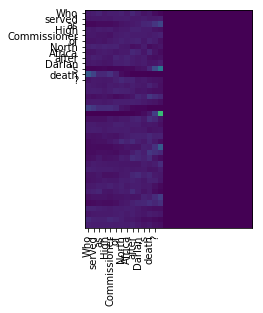

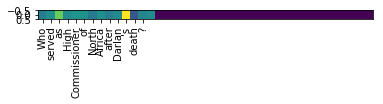

10


In [8]:
curtail =-1#len(question_words)
heat_map = A[0, :curtail, :curtail]
plt.imshow(heat_map, vmin=0, vmax=1.)
plt.xticks(np.arange(len(question_words)), question_words, rotation='vertical')
plt.yticks(np.arange(len(question_words)), question_words)
plt.show()

plt.imshow(a[0])
plt.xticks(np.arange(len(question_words)), question_words, rotation='vertical')
plt.show()

print(np.argmax(a[0]))

In [9]:
np.sum(A[0], axis = 1)

array([ 0.99999839,  0.99999774,  0.99999833,  0.9999975 ,  0.9999975 ,
        0.99999797,  0.99999833,  0.99999702,  0.99999827,  0.99999809,
        0.99999702,  0.99999893,  0.99999833,  0.99999762,  0.99999821,
        0.99999666,  0.99999833,  0.99999857,  0.99999845,  0.99999779,
        0.99999827,  0.99999833,  0.9999975 ,  0.99999845,  0.99999785,
        0.99999785,  0.99999821,  0.99999797,  0.99999797,  0.99999774,
        0.99999702,  0.99999845,  0.99999827,  0.99999768,  0.99999803,
        0.99999797,  0.99999774,  0.99999833,  0.99999768,  0.99999744], dtype=float32)